# Cervical Cancer Risk Prediction

In [6]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import plotly.express as px
from jupyterthemes import jtplot

# Set the style of the notebook to be monokai theme to see the x and y axes clearly. Otherwise, the xlabel and ylabel on any plot is black on black and hard to visualize.
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [59]:
# Import the dataset
df = pd.read_csv('cervical_cancer.csv')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Data Preprocessing

In [60]:
# Save the features in a numpy array
header_array = df.columns.to_numpy()
print(header_array)

# Get dataframe info
print(df.info())

# Get the statistics of the data frame
df.describe()

# Replace '?' with NaN
df = df.replace('?', np.nan)

['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes' 'Smokes (years)' 'Smokes (packs/year)'
 'Hormonal Contraceptives' 'Hormonal Contraceptives (years)' 'IUD'
 'IUD (years)' 'STDs' 'STDs (number)' 'STDs:condylomatosis'
 'STDs:cervical condylomatosis' 'STDs:vaginal condylomatosis'
 'STDs:vulvo-perineal condylomatosis' 'STDs:syphilis'
 'STDs:pelvic inflammatory disease' 'STDs:genital herpes'
 'STDs:molluscum contagiosum' 'STDs:AIDS' 'STDs:HIV' 'STDs:Hepatitis B'
 'STDs:HPV' 'STDs: Number of diagnosis' 'STDs: Time since first diagnosis'
 'STDs: Time since last diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx'
 'Hinselmann' 'Schiller' 'Citology' 'Biopsy']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Nu

In [61]:
print(df.shape)

(858, 36)


In [62]:
# Check the data types of the columns
print(df.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

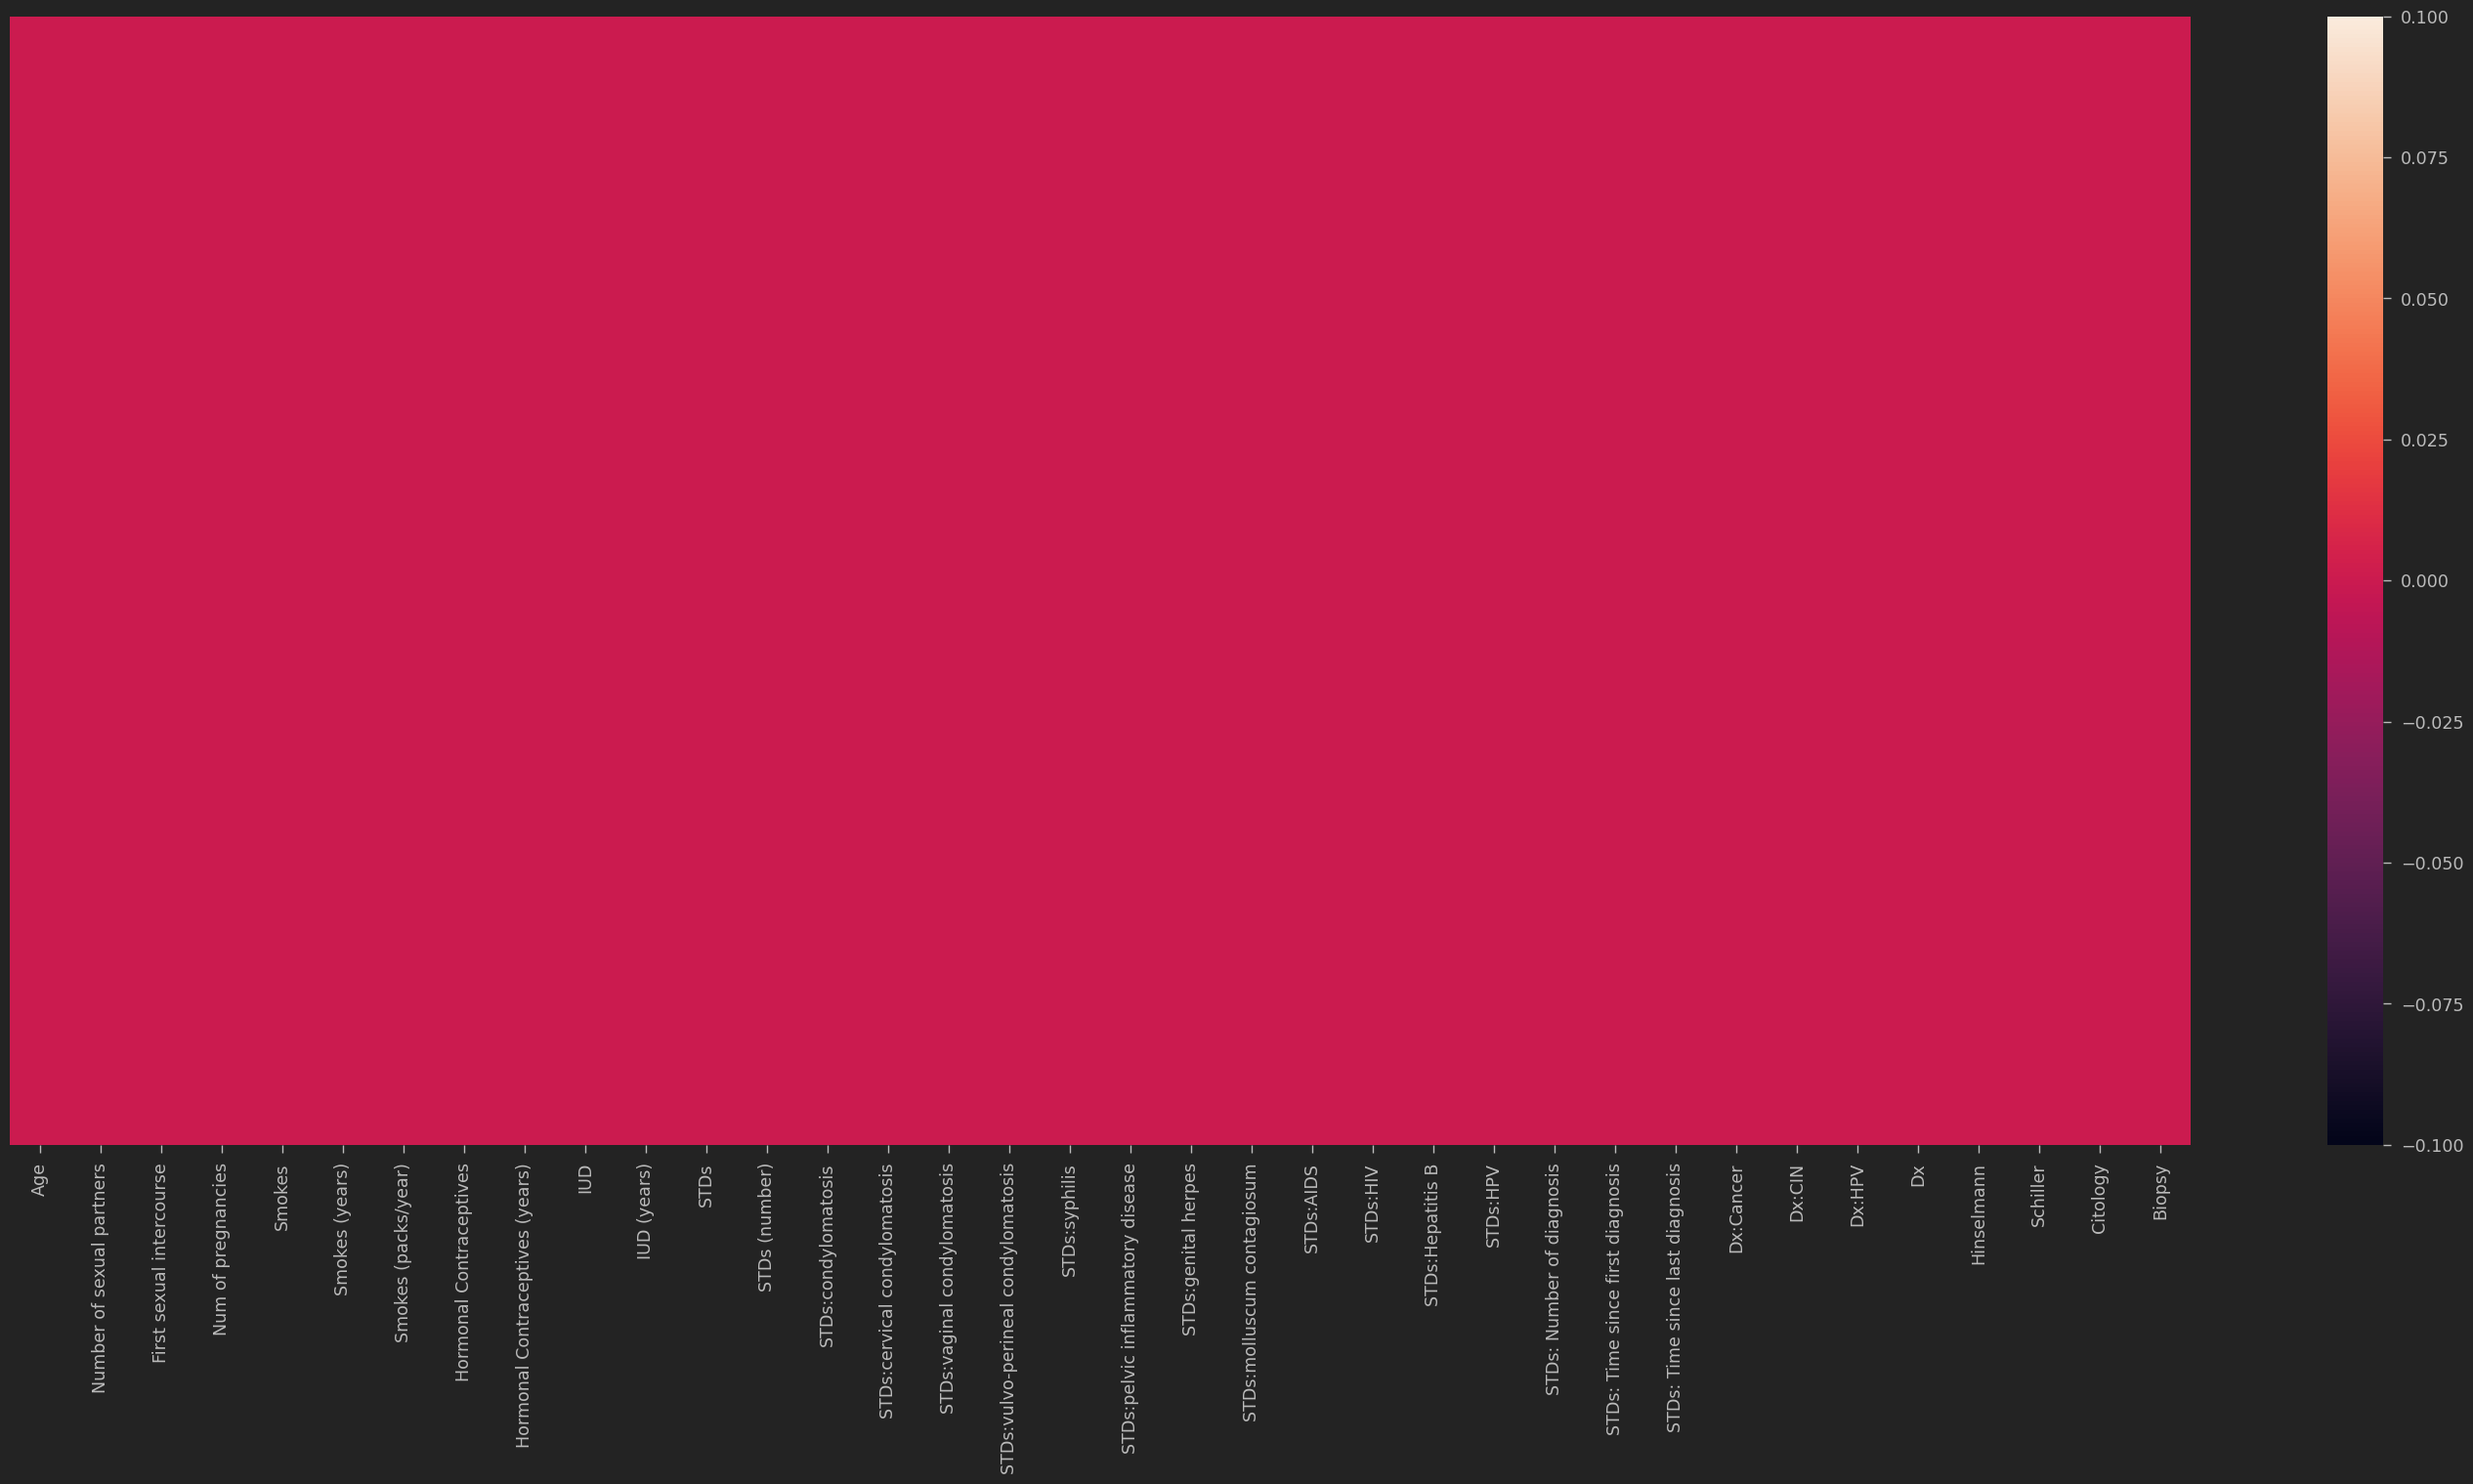

In [67]:
# Plot all the locations we have null elements to visualize the data
plt.figure(figsize=(36,15))  # set the size of the figure
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [63]:
# Convert the object type columns to float type to get the statistics of the dataframe
df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

### Handle the missing data:

In [64]:
# Step 1: Drop the columns with more than 80% missing values
# STDs: Time since first diagnosis  and STDs: Time since last diagnosis have more than 80% missing values 

df = df.dropna(subset=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])

In [65]:
# Step 2:
# OPTION CONSIDERING WE HAVE A RELATIVELY SMALL NUMBER OF MISSING VALUES AND A SMALL DATASET - to handle numerical data
# KNN imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
for feature in header_array:
  if(df[feature].isna().any() and df[feature].dtype == 'float64' and feature != ''):
    df[feature] = imputer.fit_transform(df[[feature]])

In [66]:
missing_rows = df.isnull().sum()
print(missing_rows)
print(df.info())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## Data Visualization

In [68]:
# Get the correlation matrix: To obtain the correlation between the features
corr_matrix = df.corr()

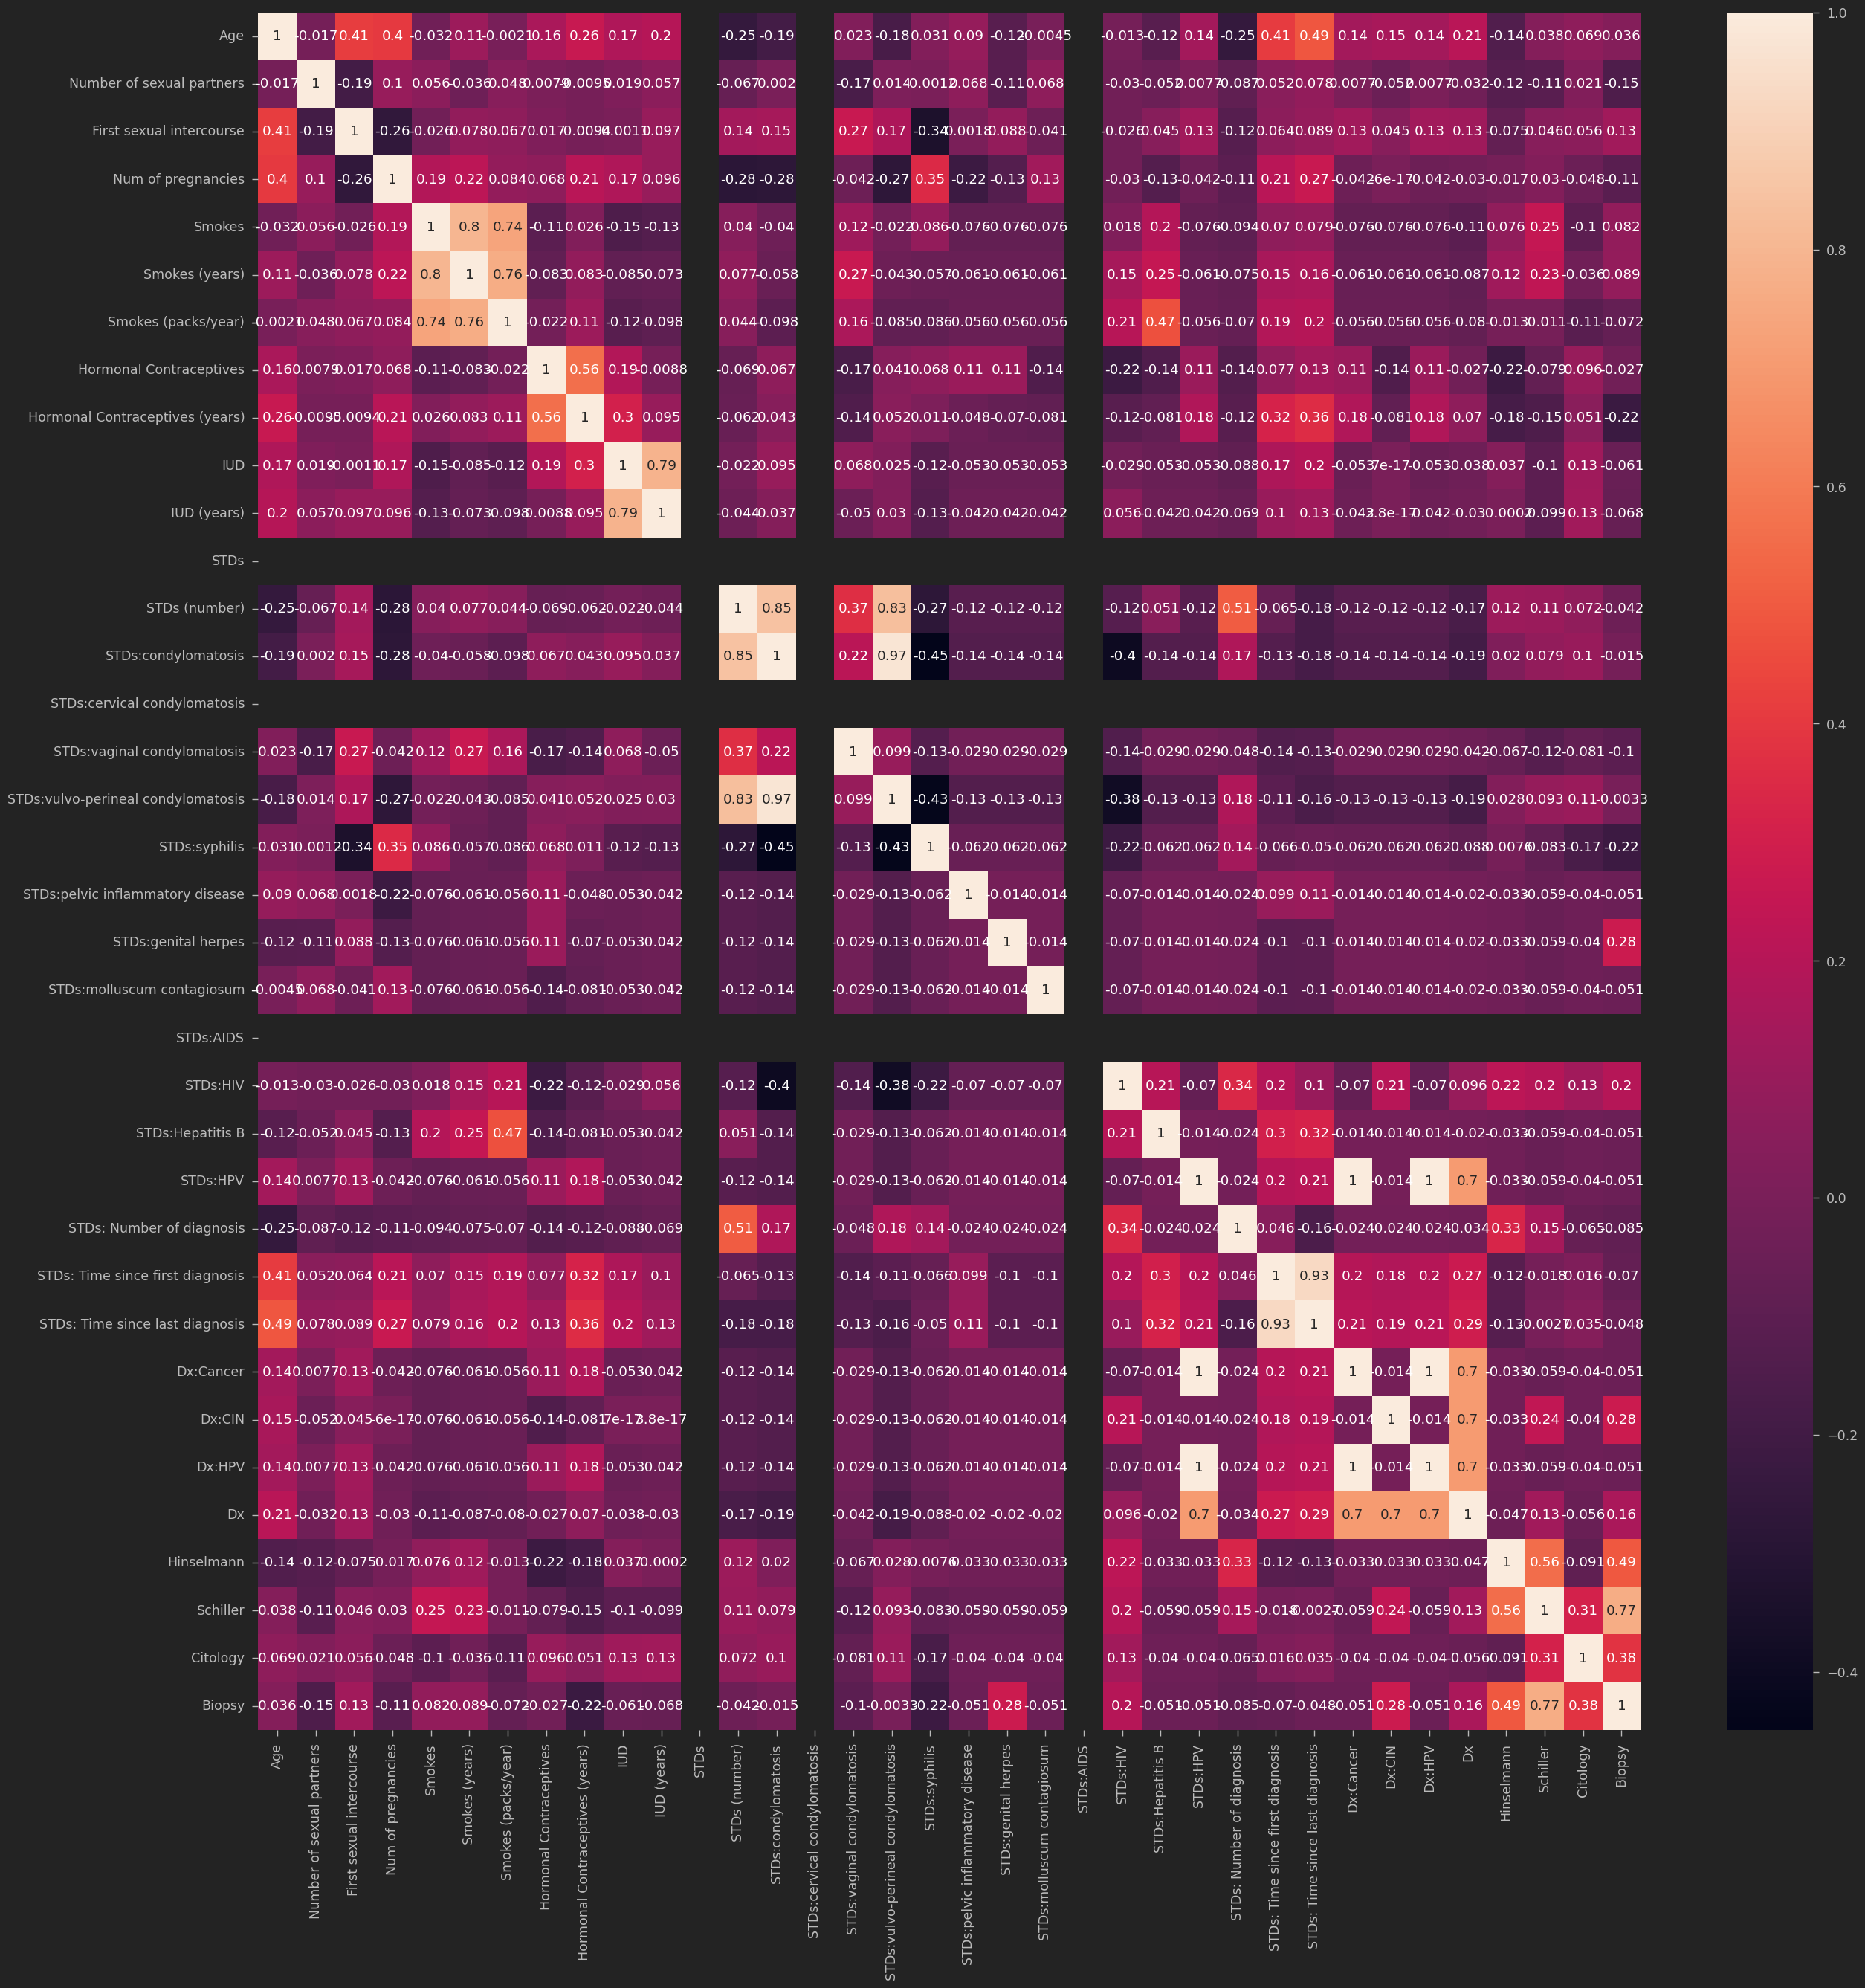

In [69]:
# Plot the correlation matrix
plt.figure(figsize=(30,30))  # set the size of the figure
sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of sexual partners'}>,
        <Axes: title={'center': 'First sexual intercourse'}>,
        <Axes: title={'center': 'Num of pregnancies'}>,
        <Axes: title={'center': 'Smokes'}>,
        <Axes: title={'center': 'Smokes (years)'}>],
       [<Axes: title={'center': 'Smokes (packs/year)'}>,
        <Axes: title={'center': 'Hormonal Contraceptives'}>,
        <Axes: title={'center': 'Hormonal Contraceptives (years)'}>,
        <Axes: title={'center': 'IUD'}>,
        <Axes: title={'center': 'IUD (years)'}>,
        <Axes: title={'center': 'STDs'}>],
       [<Axes: title={'center': 'STDs (number)'}>,
        <Axes: title={'center': 'STDs:condylomatosis'}>,
        <Axes: title={'center': 'STDs:cervical condylomatosis'}>,
        <Axes: title={'center': 'STDs:vaginal condylomatosis'}>,
        <Axes: title={'center': 'STDs:vulvo-perineal condylomatosis'}>,
        <Axes: title={'center': 'STDs:syphilis'}>]

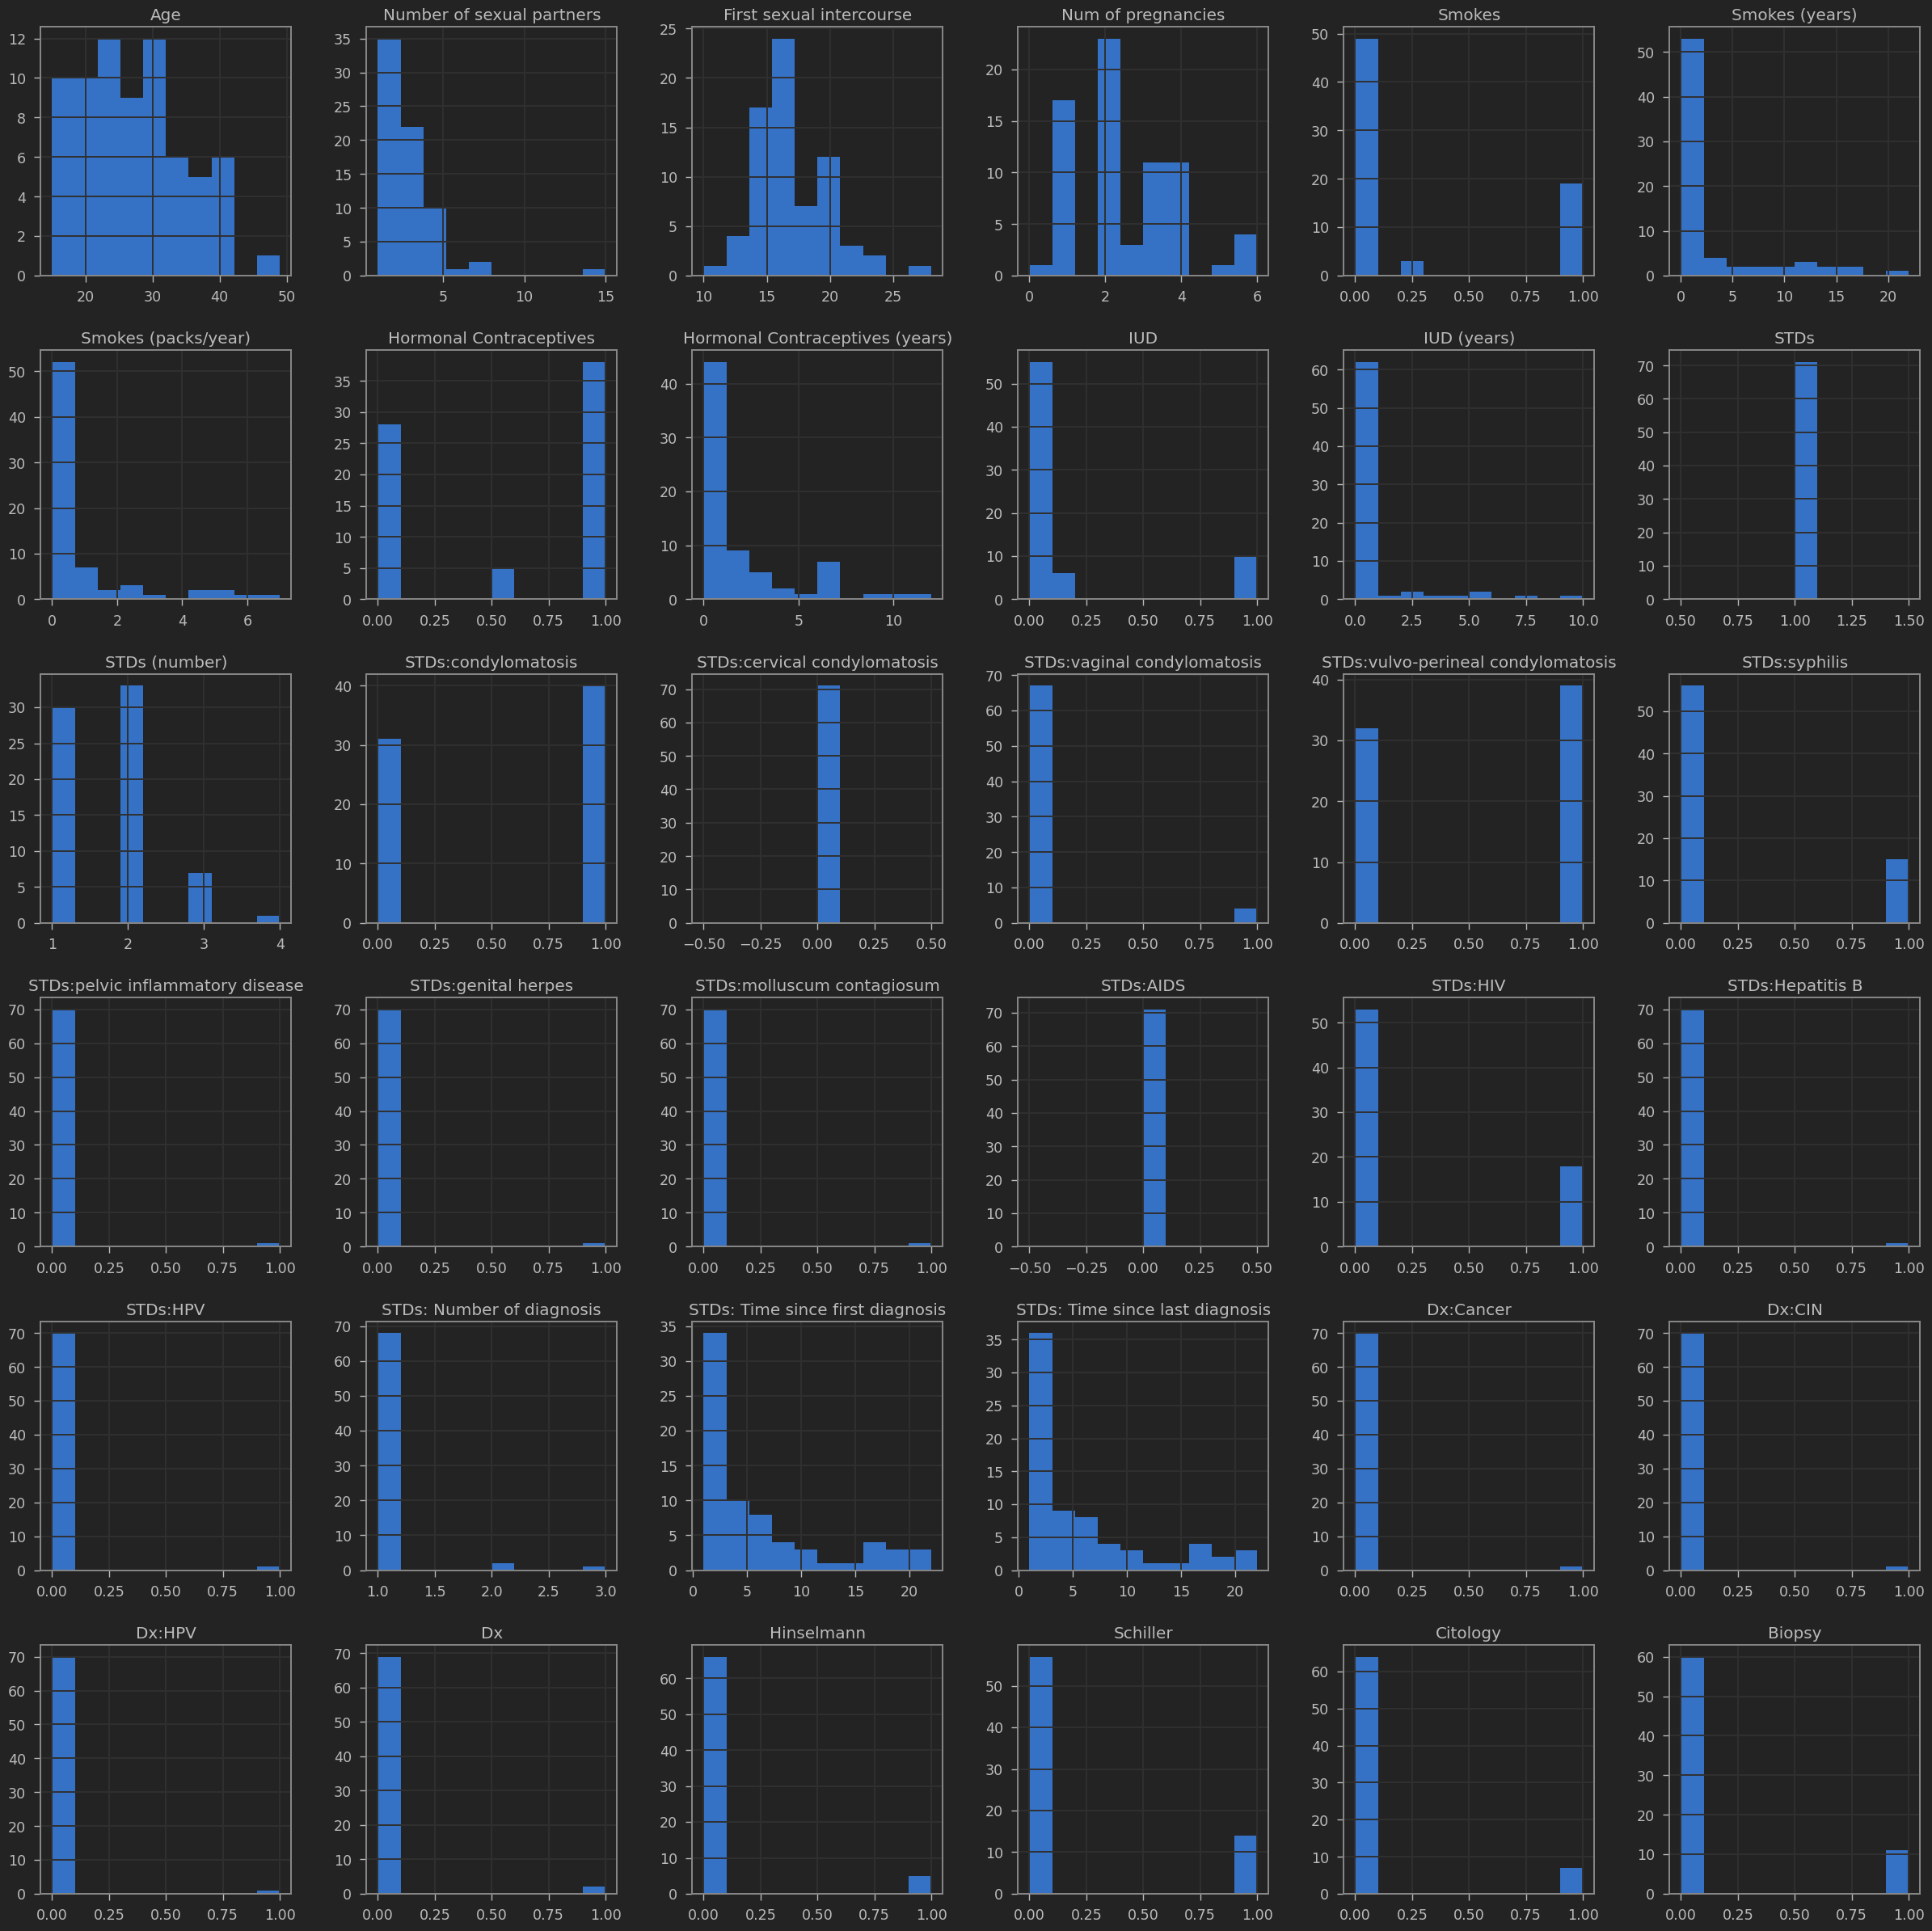

In [70]:
# Plot the histogram 
df.hist(bins=10, figsize=(30,30), color='b')

## Splitting the data and performing data normaliztion

In [72]:
# Split the data into predictures and target
predictors = df.drop(columns='Biopsy', axis=1)
target = df['Biopsy']

## Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X = scaler.fit_transform(predictors)

In [74]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=10)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(56, 35) (56,)
(15, 35) (15,)


## Train and test a XGBoost classifer model

In [76]:
import xgboost as xgb

model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
# Predict the score of the trained model using the testing dataset
result_test = model.score(X_train, y_train)
result_test

0.9642857142857143

In [80]:
# Predict the score of the trained model using the testing dataset
result_test = model.score(X_test, y_test)
result_test

0.9333333333333333

In [81]:
# Make predictions on the test data
predictions = model.predict(X_test)

## Evalute the model

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.50      1.00      0.67         1

    accuracy                           0.93        15
   macro avg       0.75      0.96      0.81        15
weighted avg       0.97      0.93      0.94        15



Text(0.5, 68.38888888888887, 'Actual class')

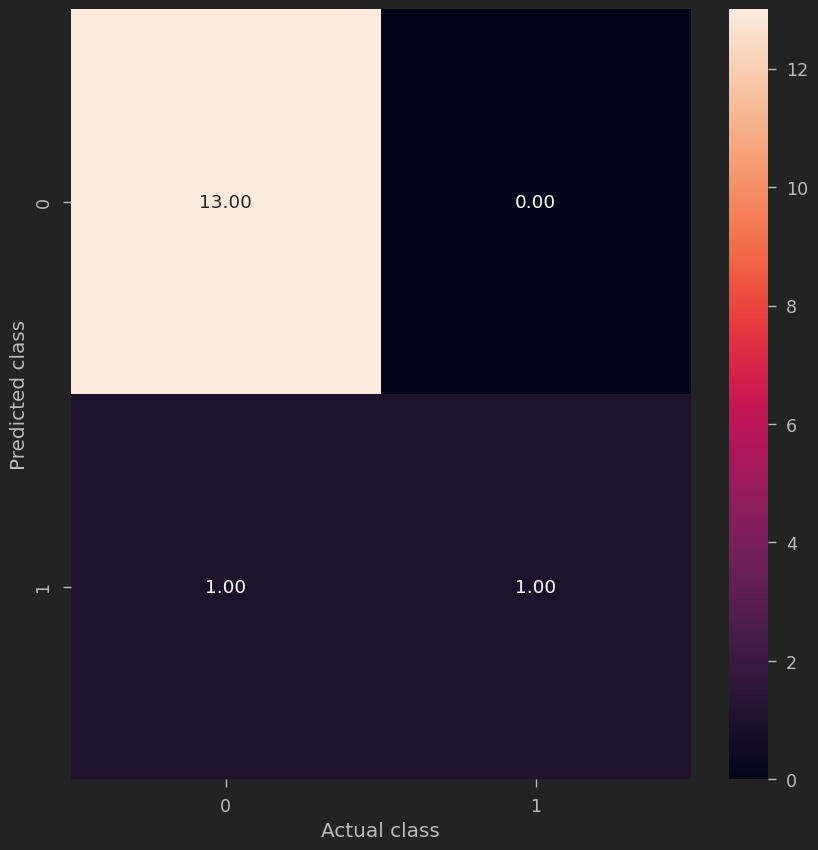

In [84]:
# Confusion Matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(predictions, y_test) 
sns.heatmap(cm, annot = True,fmt = '.2f')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')